In [1]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import glob, os
import PIL
from PIL import Image , ImageFont 
from PIL import ImageDraw
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

sns.set_context("paper", rc={"lines.linewidth": 3},font_scale=1.2)

In [2]:
data = np.loadtxt('ALK1_20_Run1_oligo_highest_size.dat')
#data[:,1]
df  = pd.read_csv('ALK1_20_Run1_oligo_highest_size.dat',sep='\s+', names=['Time', 'Oligo'])
#df['Oligo']
window_size     = 3
moving_averages = []
len(df['Oligo'])

400

In [3]:
oligo=np.array(data[:,1])
#oligo

In [4]:
def BlockAverage(data, windows_size):
    #print ("windows_size=",windows_size)
    #print ("data length=", len(data))
    #print ("Number of blocks=", len(data)/windows_size)
    Block_Mean=[]
    Block_std =[]

    def chunks(data,windows_size ):
        for i in range(0, len(data), windows_size):
                yield data[i:i + windows_size]
    output = chunks(data,windows_size)        
    for i in output:
        #print (i, i.mean(), i.std())
        var1 = i.mean()
        var2 = np.round(i.std(),2)
        Block_Mean.append(var1)
        Block_std.append(var2)

    return(Block_Mean, Block_std)

In [5]:
avz,st  =BlockAverage(oligo, 3)
avz1,st1=BlockAverage(oligo, 4)
avz2,st2=BlockAverage(oligo, 5)

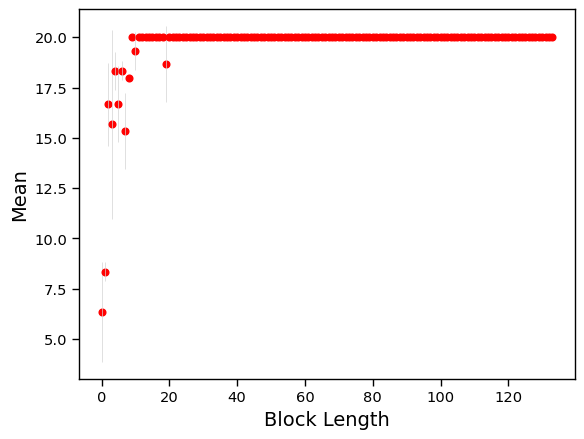

In [6]:
fig, ax = plt.subplots()
for i in range(0,len(avz)):
    #print (i,avz[i])
    plt.plot(i,avz[i],'ro',lw=1)
    plt.errorbar(i,avz[i], yerr =st[i],ecolor='lightgray', elinewidth=0.5)
    plt.xlabel("Block Length",fontsize=14)
    plt.ylabel("Mean",fontsize=14)
    
    #ax.xaxis.set_minor_locator(MultipleLocator(50))
    #ax.yaxis.set_minor_locator(MultipleLocator(1))
#plt.show()

In [7]:
xx =np.array(avz)
xx1=np.array(avz1)
xx2=np.array(avz2)
block=3

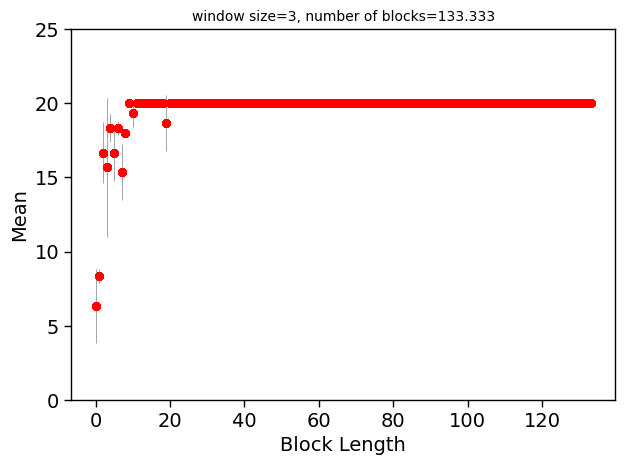

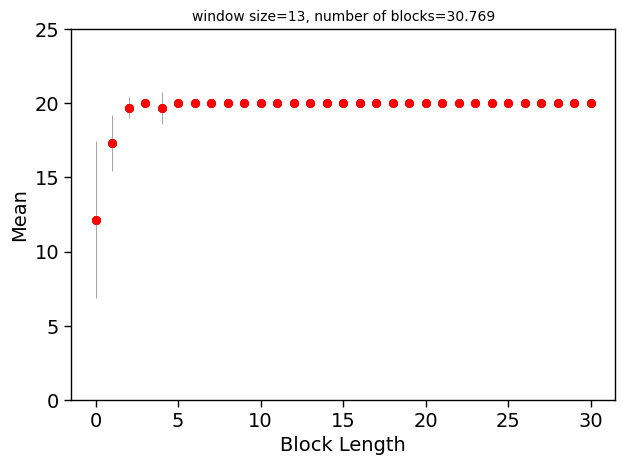

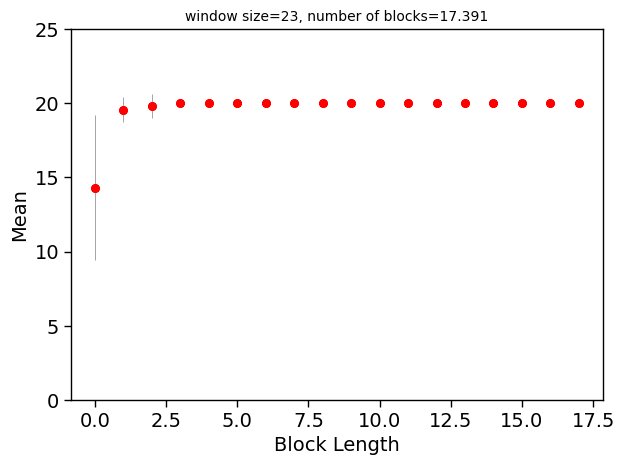

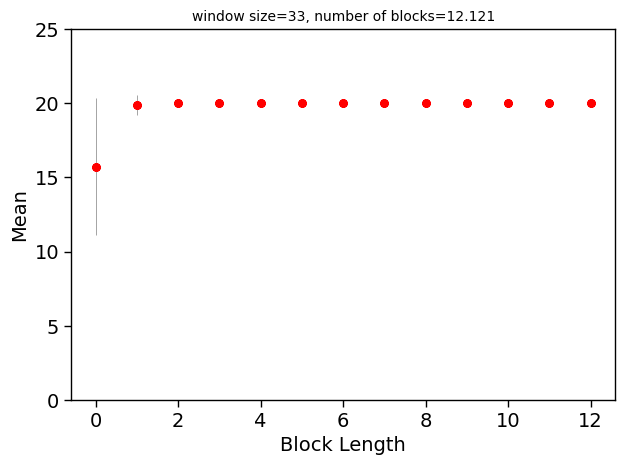

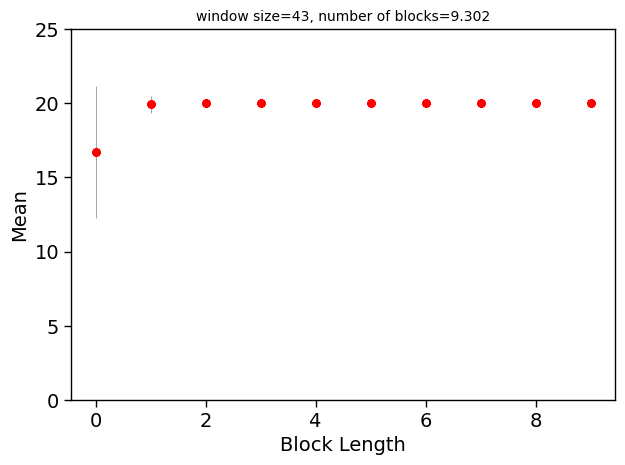

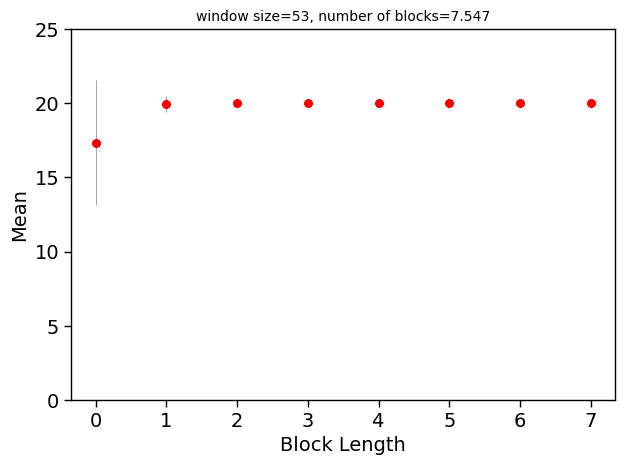

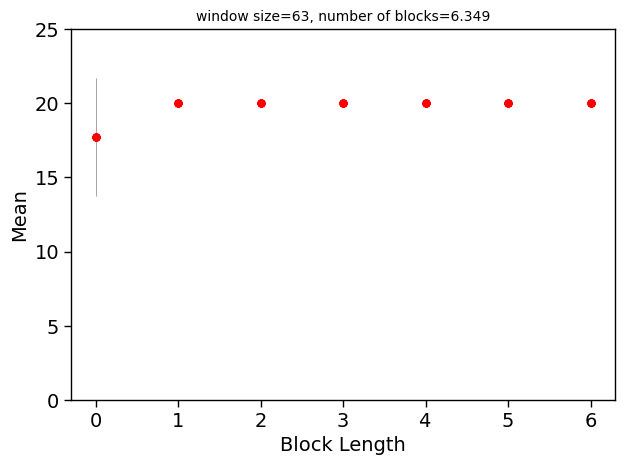

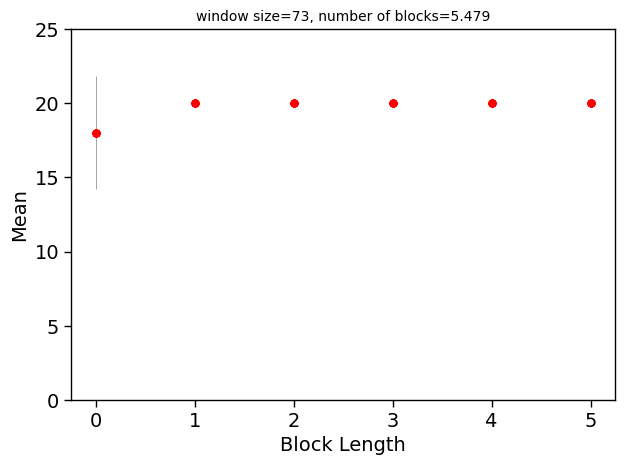

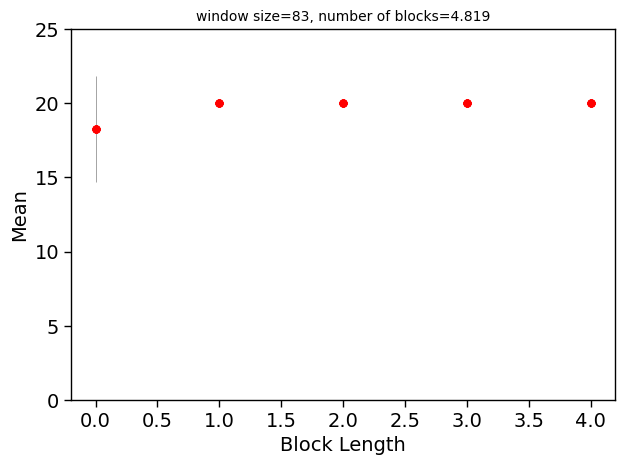

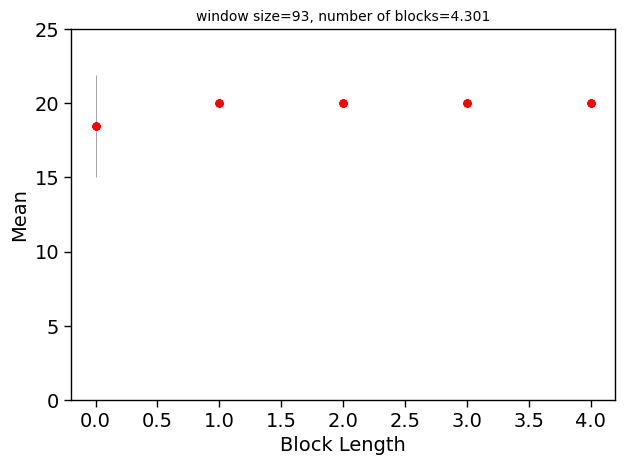

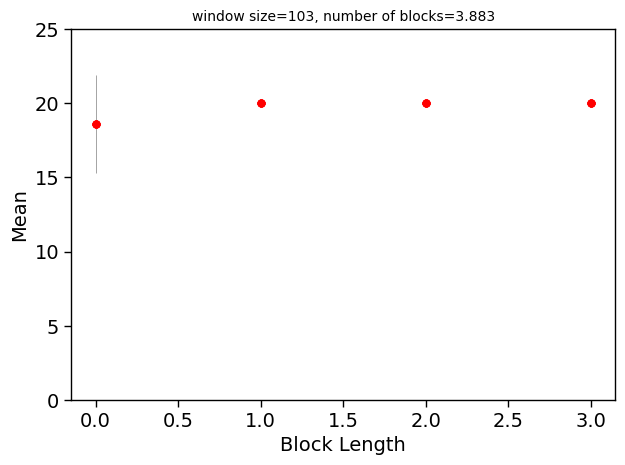

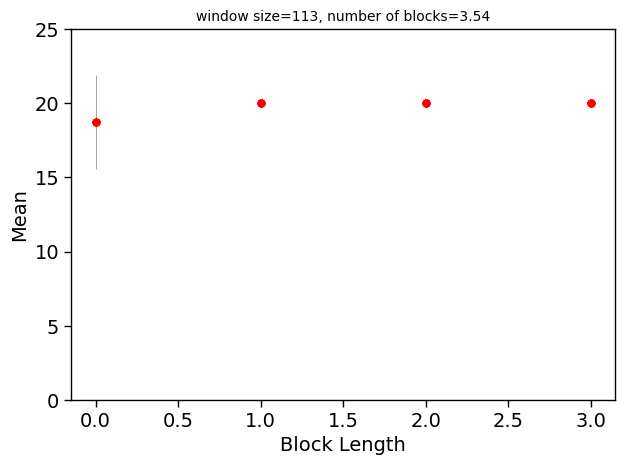

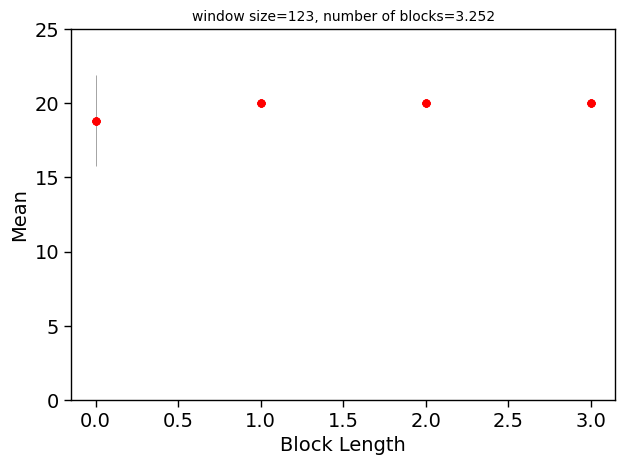

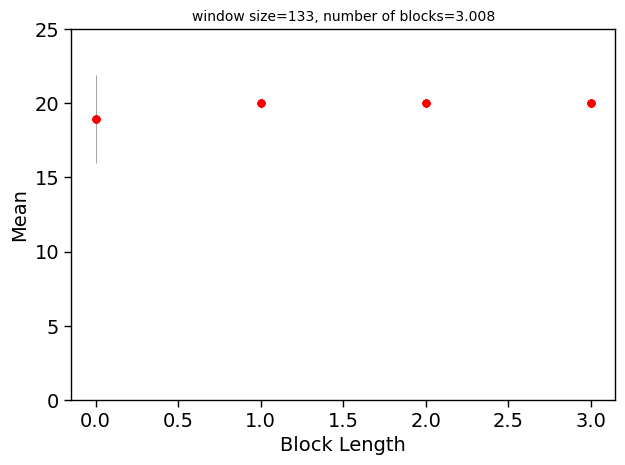

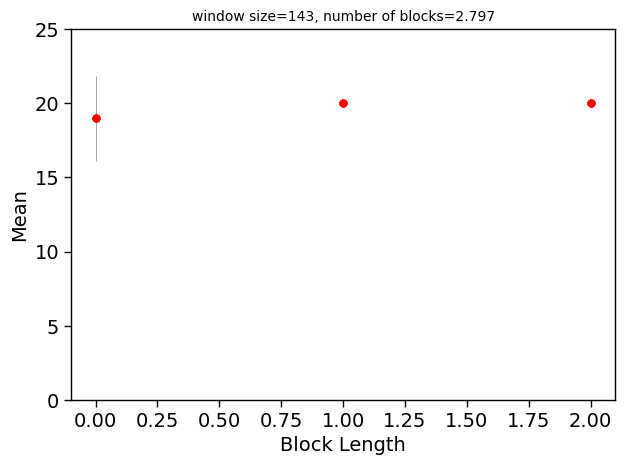

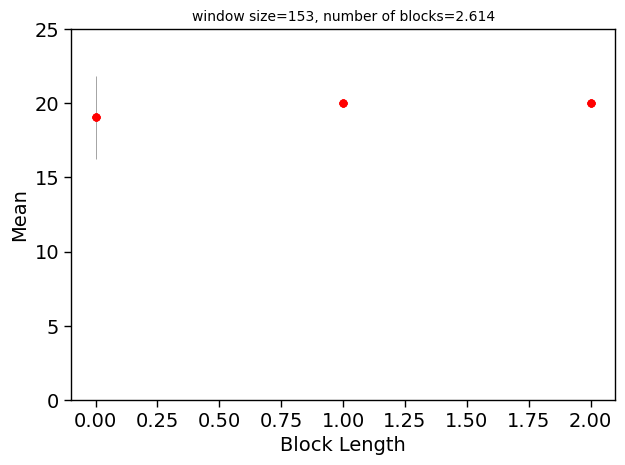

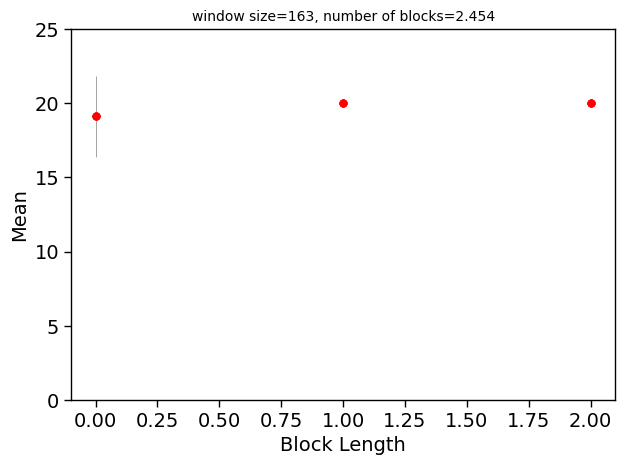

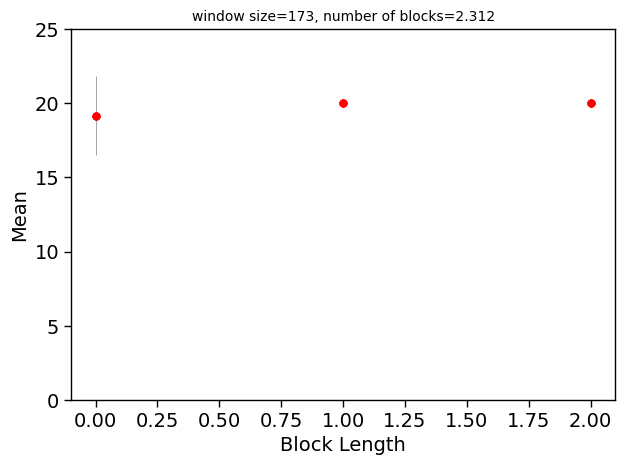

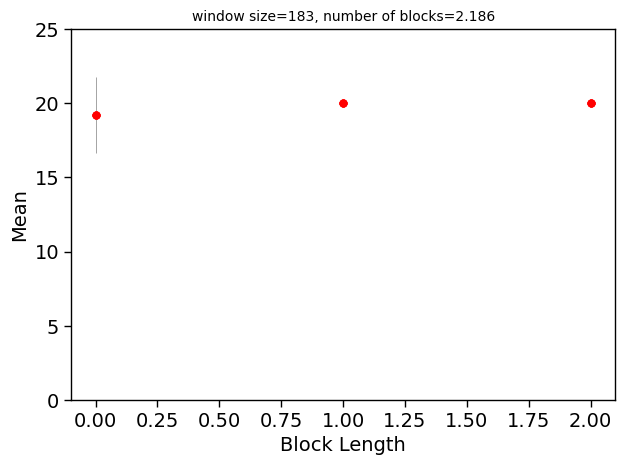

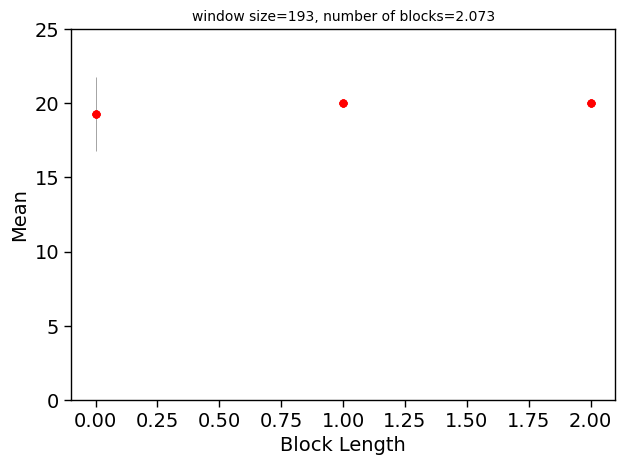

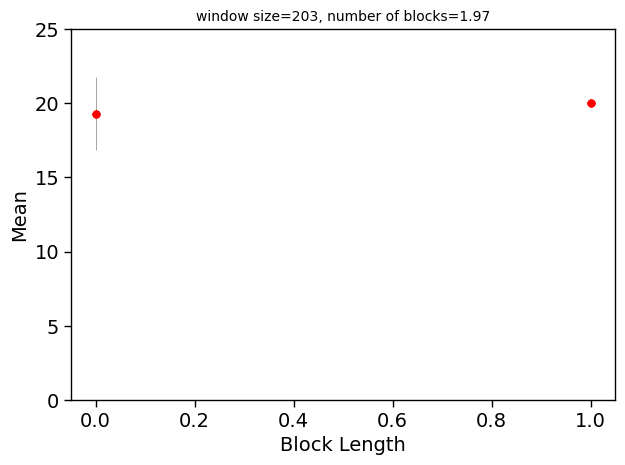

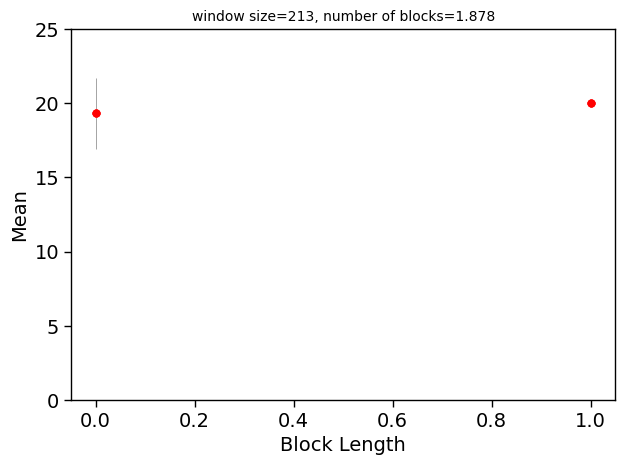

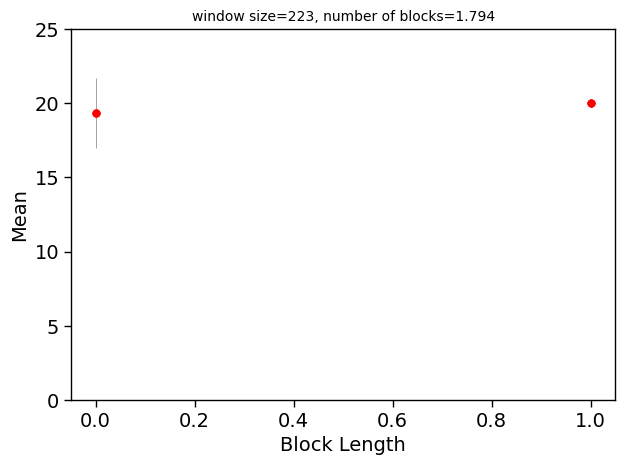

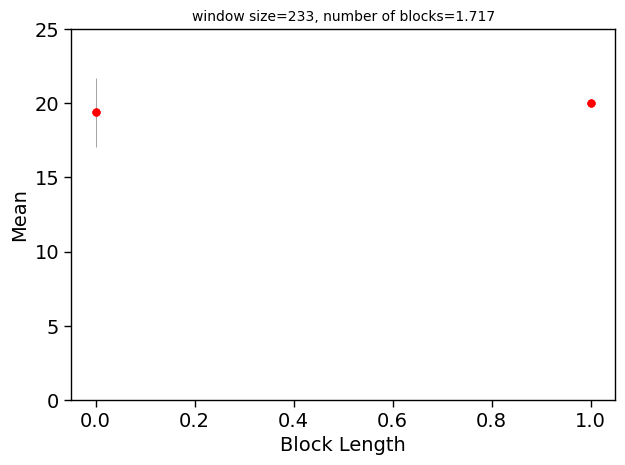

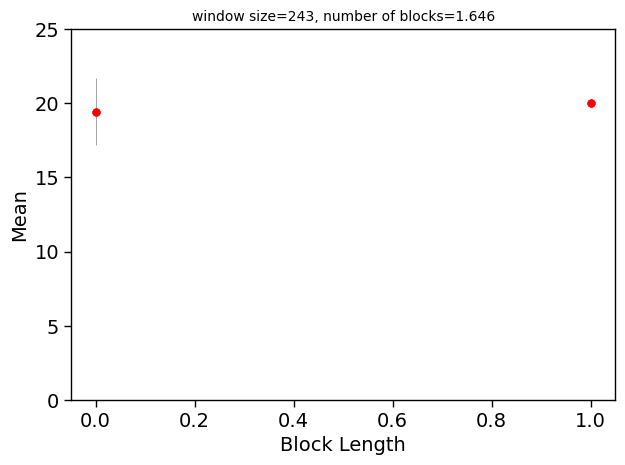

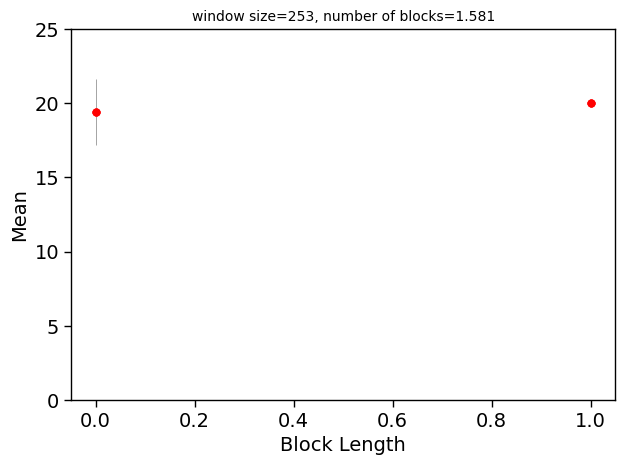

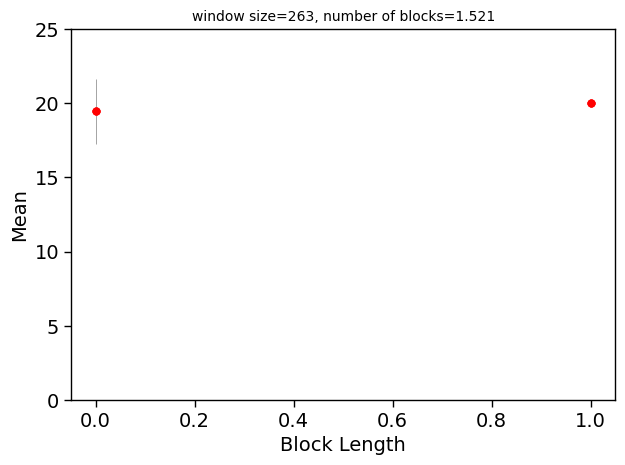

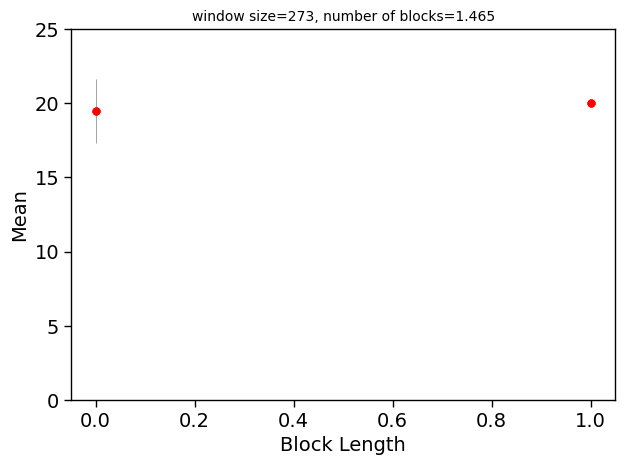

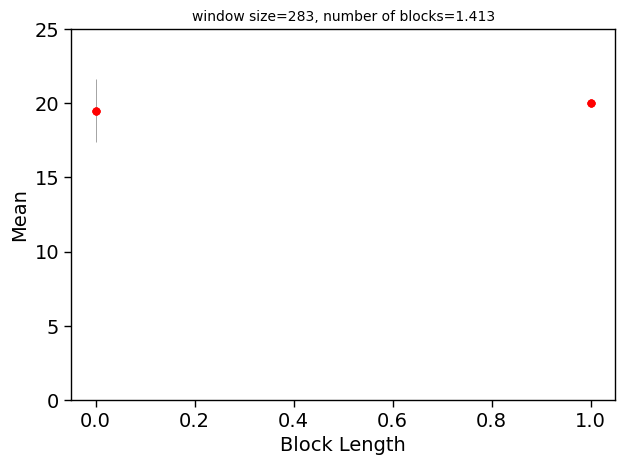

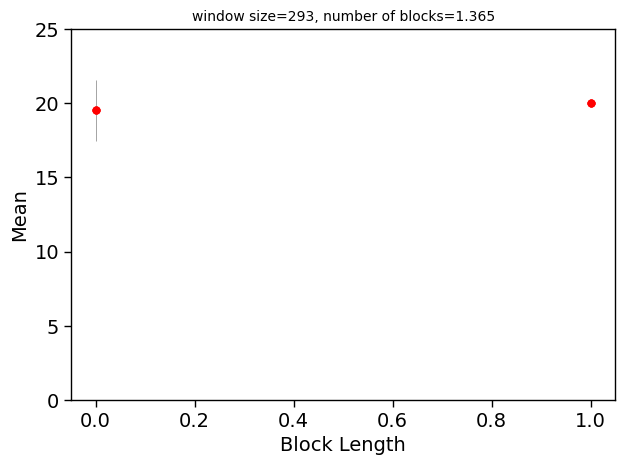

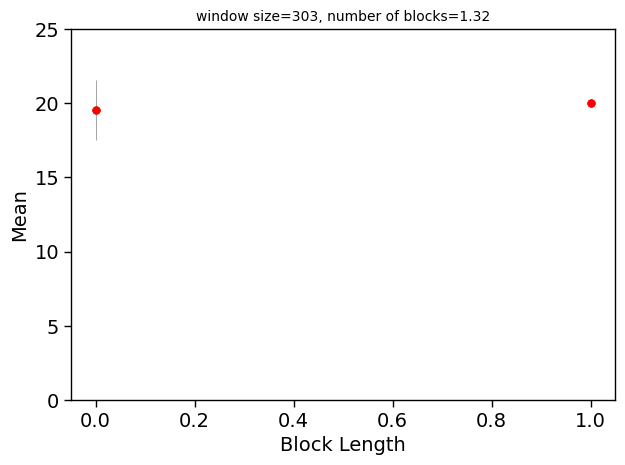

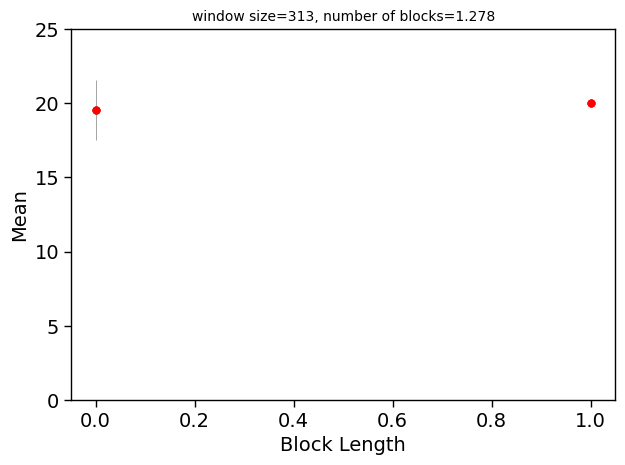

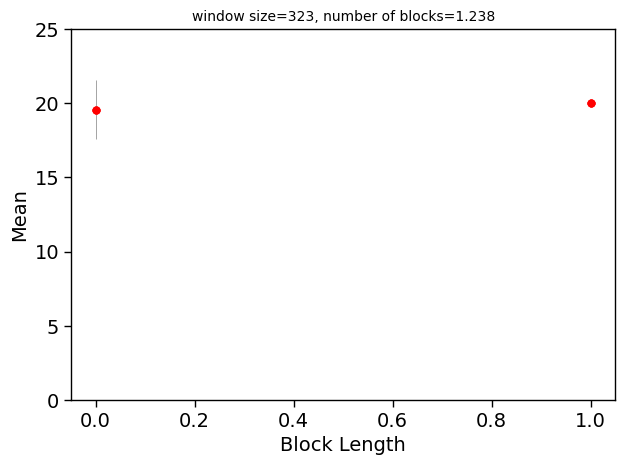

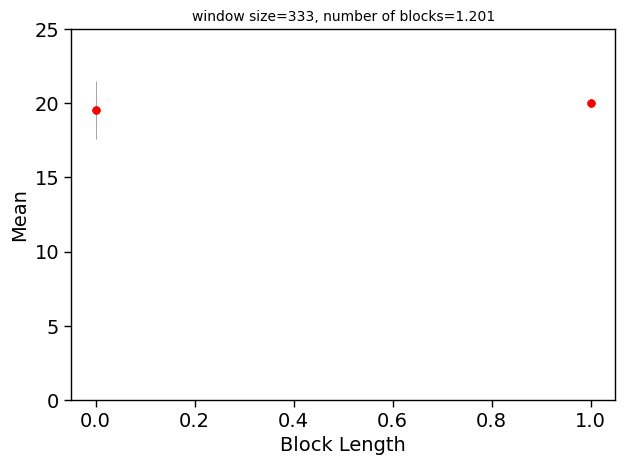

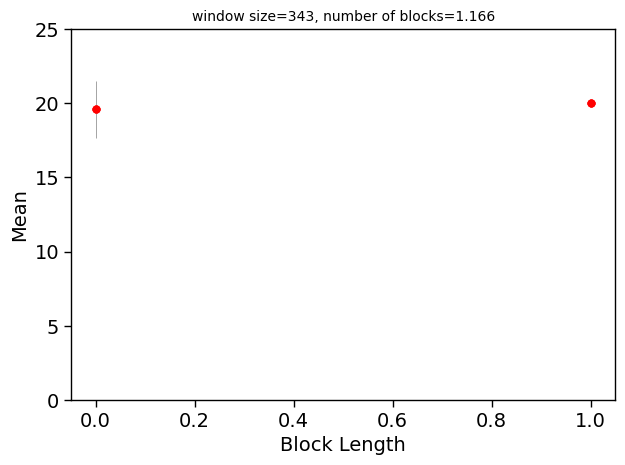

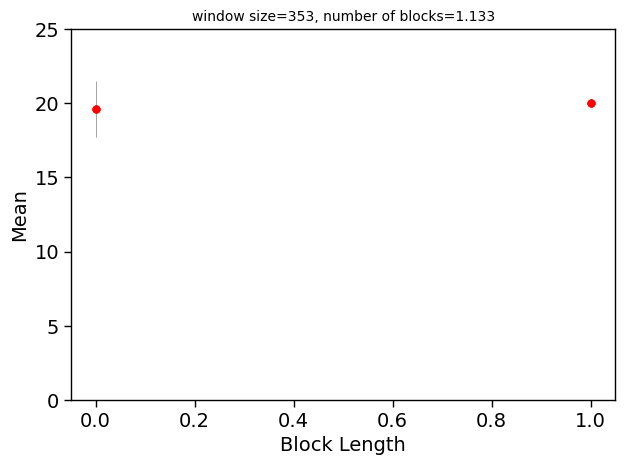

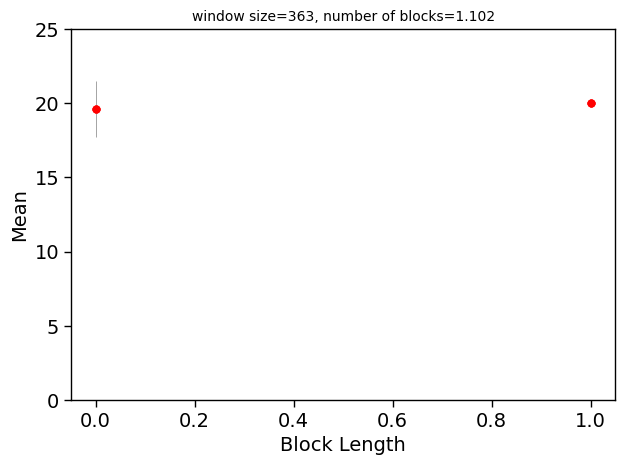

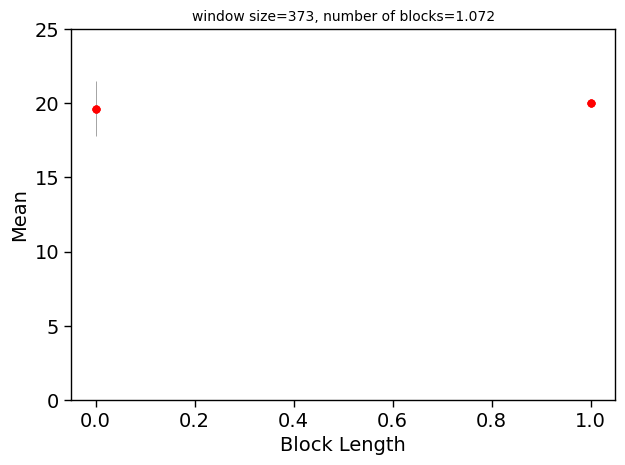

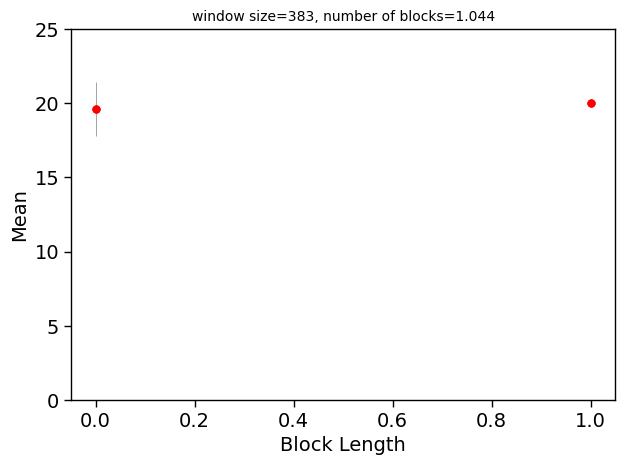

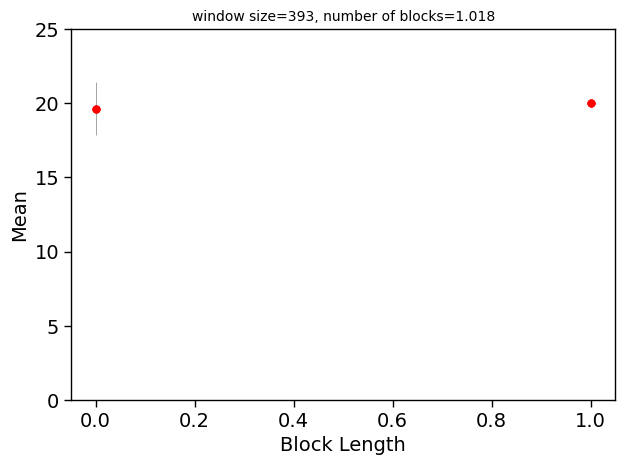

In [8]:
for i in range(3,len(data),10):
    avz,st=BlockAverage(oligo, i)
    #print (avz, st)
    block =i  
    fig, ax = plt.subplots()  
    for i in range(0,len(avz)):
    #print (i,avz[i])
        plt.plot(i,avz[i],'ro',lw=1)
        plt.errorbar(i,avz[i], yerr =st[i],ecolor='gray', elinewidth=0.5)
        plt.xlabel("Block Length",fontsize=14)
        plt.ylabel("Mean",fontsize=14)
        plt.plot(avz,'ro',lw=0.1)        
    
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    
    plt.title('window size={}, number of blocks={}'.
              format(block, np.round((len(data)/block),3)),
              fontsize=10)
    
    #ax.xaxis.set_minor_locator(MultipleLocator(25))
    #ax.yaxis.set_minor_locator(MultipleLocator(1))
    plt.ylim(0,25)
    #fig  = plt.figure(figsize=(1,4), dpi=600)
    plt.tight_layout()
    plt.savefig('ALK1_'+str(block)+'.png', dpi=600, bbox_inches='tight')

    plt.show()
    

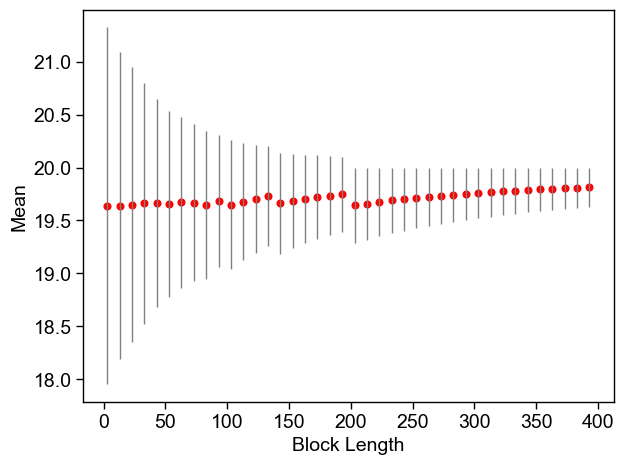

In [9]:
fig, ax = plt.subplots()

for i in range(3,len(data),10):
    avz,st  = BlockAverage(oligo, i)
    var     = np.array(avz)    
    mean    = var.mean()
    std     = var.std()
    #print (i,mean,std)
   
    plt.plot(i,mean,'ro',lw=1)
    plt.errorbar(i,mean, yerr =std,ecolor='gray', elinewidth=1)
    plt.xlabel("Block Length",fontsize=14,font='arial')
    plt.ylabel("Mean",fontsize=14,font='arial')
    plt.xticks(font='arial',fontsize=14)
    plt.yticks(font='arial',fontsize=14)
    ax.xaxis.set_minor_locator(MultipleLocator(50))
    ax.yaxis.set_minor_locator(MultipleLocator(1))
    
plt.tight_layout()
plt.savefig('Blocksize_ALK1.png', dpi=600, bbox_inches='tight')

plt.show()

In [10]:
images = sorted(glob.glob("*png"))
from natsort import natsorted 
natsort_file_names = natsorted(images)
#print(natsort_file_names)

In [11]:
for i in range(0,len(natsort_file_names)):
    #print(i, natsort_file_names[i])
    img=PIL.Image.open(natsort_file_names[i])
    I1 =PIL.ImageDraw.Draw(img)
    #I1.text((50,50), str(prefix[0])+" ns", align='center',font='Arial',fill=(255,0,0))
    #img.show()
    img.save("images%04d.png" % i)

In [16]:
#command1 = 'rm *mp4'
command2='ffmpeg -r 5 -f image2 -framerate 2.5 -s 1920x1080  -i images%04d.png \
-vcodec libx264 -crf 10  -pix_fmt yuv420p ALK1_20.mp4'
command3= 'ffmpeg -ss 08 -i ALK1_20.mp4 -c copy -t 10 output.mp4'
command4='mv output.mp4 ALK1_20.mp4'

os.system(command2)
os.system(command3)
os.system(command4)

ffmpeg version 6.0 Copyright (c) 2000-2023 the FFmpeg developers
  built with Apple clang version 14.0.3 (clang-1403.0.22.14.1)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/6.0 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags= --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --enable-libfreetype --enable-frei0r --enable-libass --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libspeex --enable-libsoxr --enable-libzmq --enable-libzimg --disable-libjack --di

0